# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# EDA

In [4]:
dataset=pd.read_csv(r'C:\Users\admin\Downloads\Final Project 2\gold.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [40]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [54]:
dataset.shape

(2290, 6)

In [69]:
for col in dataset.select_dtypes(include='object').columns:
    print(col)
    print(dataset[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [70]:
categorical_features=[feature for feature in dataset.columns if ((dataset[feature].dtypes=='O')&(feature not in['GLD']))]
categorical_features

['Date']

In [74]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Date and number of categories are 2290


In [ ]:
#correlation
corr = dataset.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of dataset Features', y = 1.05, size=15)

In [56]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Skewness: %f 0.33413834726925085


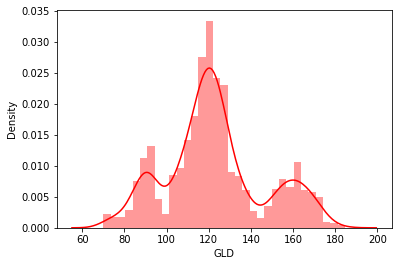

In [47]:
sns.distplot(dataset['GLD'], color = 'red')
print('Skewness: %f', dataset['GLD'].skew())

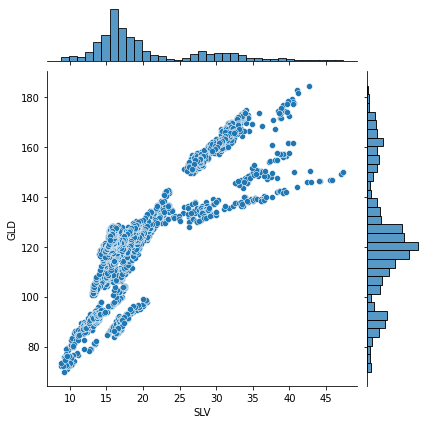

In [19]:
sns.jointplot(x =dataset['SLV'], y = dataset['GLD'])

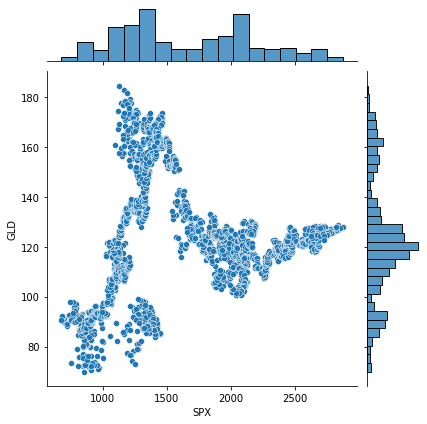

In [21]:
sns.jointplot(x =dataset['SPX'], y = dataset['GLD'])

# PREPARE THE DATASET

In [29]:
x = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [59]:
print(x)

[[1.44716003e+03 7.84700010e+01 1.51800000e+01 1.47169200e+00]
 [1.44716003e+03 7.83700030e+01 1.52850000e+01 1.47449100e+00]
 [1.41163000e+03 7.73099980e+01 1.51670000e+01 1.47549200e+00]
 ...
 [2.72307007e+03 1.44100000e+01 1.57400000e+01 1.19175300e+00]
 [2.73012988e+03 1.43800000e+01 1.55600000e+01 1.19311800e+00]
 [2.72578003e+03 1.44058000e+01 1.54542000e+01 1.18203300e+00]]


In [60]:
print(y)

[ 84.860001  85.57      85.129997 ... 125.18     124.489998 122.5438  ]


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


# PREDICTION ALGORITHM

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = regressor.predict(x_test)
y_pred

array([126.96279893, 116.7967996 , 139.57360086, 121.5681999 ,
        94.1399005 , 154.81420069, 117.56620144, 113.34240144,
       153.43790043, 105.59500059, 103.28599853, 119.90550074,
        92.04499923, 159.2187009 , 121.51659829, 117.51070066,
        86.58089817,  91.92419931,  93.02590029, 125.86769985,
        83.7964995 , 117.70069888, 126.28539829, 172.34109738,
       168.95929695, 139.18480324, 114.18709953, 159.96600228,
       133.955901  , 115.84830064, 111.2557009 , 104.80000178,
       128.08500001, 122.15449968,  98.81359979, 120.04919972,
        84.24910038, 115.01350003, 127.35809897, 140.48309841,
       107.36300107, 131.68140126, 108.38269948, 134.46679939,
       133.65049912, 148.96139956, 119.6200005 , 157.32300041,
       156.56930159, 127.68459973, 123.93570027, 115.12659826,
       124.0683005 , 119.24979991, 153.91910032, 121.55789952,
       112.22840006,  86.84689952, 155.72509916, 117.80430108,
        88.22869908, 114.75690004,  83.35469929, 146.48

In [65]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.3103137310917028
MSE :   5.631071762070612
RMAE :   2.3729879397229587


In [63]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9890541770596076


In [37]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9983667153816033
0.9890541770596076


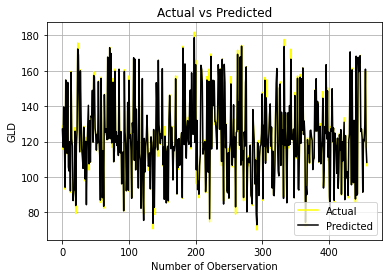

In [46]:
plt.plot(y_test, color = 'yellow', label = 'Actual')
plt.plot(y_pred, color = 'black', label = 'Predicted')
plt.grid(0.3)
plt.title('Actual vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [67]:
regressor.score(x_test,y_test)

0.9890541770596076